In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
df = pd.read_csv('ethical_pricing_mock_dataset_extended.csv')
df.head()

,item_name,item_category,city,base_price,production_cost,fair_wage_multiplier,sustainability_score,local_demand_index,market_avg_price_city,profit_margin_standard,regulatory_adjustment,marketplace
0,Biography,Books,Pune,994.71,691.72,1.45,8.9,0.59,1075.24,0.25,23.65,Offline Store
1,Headphones,Electronics,Ahmedabad,265.17,155.19,1.23,7.7,0.67,244.55,0.21,16.28,Offline Store
2,Self-Help Book,Books,Jaipur,1575.24,867.63,1.31,8.0,0.73,1730.20,0.17,22.21,Flipkart
3,Self-Help Book,Books,Pune,417.79,267.96,1.48,8.1,0.38,458.53,0.29,14.25,Own Brand Website
4,T-shirt,Clothing,Pune,1196.90,797.93,1.32,7.2,0.69,1232.63,0.22,15.15,Flipkart


In [4]:
features = ['item_category', 'item_name', 'city']
target = 'base_price'

In [5]:
le_category = LabelEncoder()
le_name = LabelEncoder()
le_city = LabelEncoder()

df['item_category_enc'] = le_category.fit_transform(df['item_category'])
df['item_name_enc'] = le_name.fit_transform(df['item_name'])
df['city_enc'] = le_city.fit_transform(df['city'])

label_encoders = {
    'item_category': le_category,
    'item_name': le_name,
    'city': le_city
}


X = df[['item_category_enc', 'item_name_enc', 'city_enc']]
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [7]:
def get_market_avg_price(df, item_name, city):
    subset = df[(df['item_name'] == item_name) & (df['city'] == city)]
    if len(subset) == 0:
        return df[df['item_name'] == item_name]['market_avg_price_city'].mean()
    return subset['market_avg_price_city'].mean()

def get_price_range(df, item_name, city):
    subset = df[(df['item_name'] == item_name) & (df['city'] == city)]
    if len(subset) == 0:
        subset = df[df['item_name'] == item_name]
    return subset['base_price'].min(), subset['base_price'].max()

def get_sustainability_factor(df, item_name, city):
    subset = df[(df['item_name'] == item_name) & (df['city'] == city)]
    if len(subset) == 0:
        subset = df[df['item_name'] == item_name]
    return subset['sustainability_score'].mean()

def get_local_demand_score(df, item_name, city):
    subset = df[(df['item_name'] == item_name) & (df['city'] == city)]
    if len(subset) == 0:
        subset = df[df['item_name'] == item_name]
    return subset['local_demand_index'].mean()

def get_production_cost(df, item_name, city):
    subset = df[(df['item_name'] == item_name) & (df['city'] == city)]
    if len(subset) == 0:
        subset = df[df['item_name'] == item_name]
    return subset['production_cost'].mean()

def get_fair_wage_score(df, item_name, city):
    subset = df[(df['item_name'] == item_name) & (df['city'] == city)]
    if len(subset) == 0:
        subset = df[df['item_name'] == item_name]
    return subset['fair_wage_multiplier'].mean()

def get_profit_margin(df, item_name, city):
    subset = df[(df['item_name'] == item_name) & (df['city'] == city)]
    if len(subset) == 0:
        subset = df[df['item_name'] == item_name]
    return subset['profit_margin_standard'].mean()


In [8]:
def predict_ethical_price(item_category, item_name, city):
    # Encode inputs
    cat_enc = le_category.transform([item_category])[0]
    name_enc = le_name.transform([item_name])[0]
    city_enc = le_city.transform([city])[0]
    X_input = np.array([[cat_enc, name_enc, city_enc]])
    
    # Predict ethical price
    ethical_price = model.predict(X_input)[0]
    price_min, price_max = get_price_range(df, item_name, city)
    market_avg = get_market_avg_price(df, item_name, city)
    sustainability = get_sustainability_factor(df, item_name, city)
    local_demand = get_local_demand_score(df, item_name, city)
    prod_cost = get_production_cost(df, item_name, city)
    fair_wage = get_fair_wage_score(df, item_name, city)
    profit_margin = get_profit_margin(df, item_name, city)
    
    # Market price comparison graph
    plt.figure(figsize=(6,4))
    sns.histplot(df[(df['item_name'] == item_name)]['base_price'], bins=10, label='All Cities', color='grey', alpha=0.5)
    plt.axvline(market_avg, color='blue', linestyle='--', label='Market Avg (City)')
    plt.axvline(ethical_price, color='green', linestyle='-', label='Ethical Price')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(f'Price Distribution for {item_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Local demand score graph
    plt.figure(figsize=(4,2))
    sns.barplot(x=['Local Demand'], y=[local_demand])
    plt.ylim(0,1)
    plt.title('Local Demand Score')
    plt.tight_layout()
    plt.show()
    
    # Output
    print(f"Suggested Ethical Price: ₹{ethical_price:.2f}")
    print(f"Price Range (in {city}): ₹{price_min:.2f} - ₹{price_max:.2f}")
    print(f"Market Average Price (in {city}): ₹{market_avg:.2f}")
    print(f"Sustainability Factor: {sustainability:.2f}/10")
    print(f"Local Demand Score: {local_demand:.2f}")
    print(f"Production Cost Estimate: ₹{prod_cost:.2f}")
    print(f"Fair Wage Inclusion Score: {fair_wage:.2f}")
    print(f"Profit Margin: {profit_margin:.2f}")


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


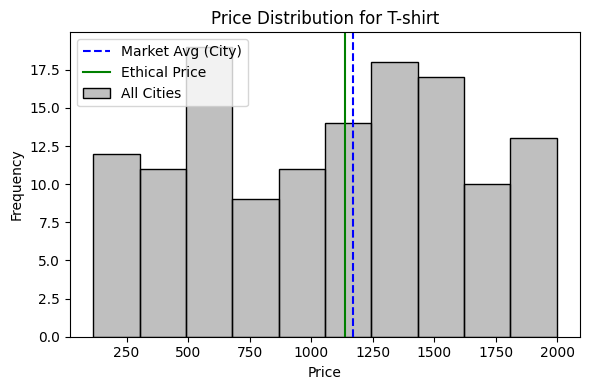

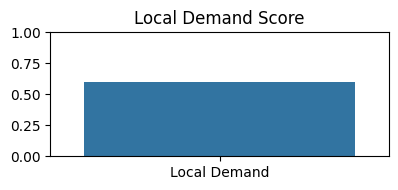

Suggested Ethical Price: ₹1138.65
Price Range (in Pune): ₹204.18 - ₹1854.08
Market Average Price (in Pune): ₹1169.89
Sustainability Factor: 6.07/10
Local Demand Score: 0.60
Production Cost Estimate: ₹692.76
Fair Wage Inclusion Score: 1.34
Profit Margin: 0.20


In [10]:
predict_ethical_price('Clothing', 'T-shirt', 'Pune')

In [11]:
import pickle

# Save model
with open('ethical_price_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save label encoders
with open('label_encoders.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoders, encoder_file)
